# Prevendo dempenho de alunos no ENEM uitlizando modelos de Regressao Linear

### Carregando as bibliotecas necessarias

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

### Carregando os dados

In [2]:
df_enem = pd.read_csv("./DADOS/enem_eng.csv", sep=";")

In [3]:
df_enem.shape

(411175, 81)

In [4]:
df_enem.head()

,NU_INSCRICAO,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,...,Q023,Q024,Q025,ATENDIMENTOS_ESPECIALIZADOS,QTD_RECURSOS,ESCOLARIDADE_PAI,ESCOLARIDADE_MAE,RENDA_CLASSE,RENDA_ARBITRARIA,RESULTADO
0,190001237802,22.0,F,Solteiro,Branca,Brasileira,1,4,?,1.0,...,B,B,B,Nao,0,Não completou ES,Não completou ES,C,Até 3.992,655.725000
1,190001237804,27.0,M,Solteiro,Parda,Naturalizado,1,2,?,NaN,...,A,A,A,Nao,0,Não sabe,Não sabe,E,Até 1.497,469.041667
2,190001237805,22.0,F,Solteiro,Branca,Brasileira,1,5,?,1.0,...,A,B,B,Nao,0,Não completou ES,Completou EF,C,Até 3.992,596.625000
3,190001237806,23.0,F,Solteiro,Amarela,Brasileira,1,5,?,1.0,...,A,B,B,Nao,0,Não completou EF,Não completou EF,D,Até 1.497,519.483333
4,190001237809,20.0,M,Solteiro,Parda,Brasileira,1,2,?,1.0,...,A,B,B,Nao,0,Nunca estudou,Não completou ES,D,Até 1.497,681.975000


In [5]:
df_enem.describe()

,NU_INSCRICAO,NU_IDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,...,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005,QTD_RECURSOS,RESULTADO
count,4.111750e+05,411169.000000,411175.000000,411175.000000,222307.000000,411175.000000,9.530200e+04,95302.000000,95302.000000,95302.000000,...,411175.000000,411175.000000,411175.000000,411175.000000,411175.000000,411175.000000,411175.000000,411175.000000,411175.000000,411175.000000
mean,1.900035e+11,21.167143,1.623790,2.466638,1.005447,0.155654,3.114589e+07,2.244528,1.029737,1.004480,...,1.104877,124.688758,127.733933,119.337508,126.207868,99.245869,597.213936,3.783557,0.012586,527.856018
std,1.486087e+06,6.994727,0.751033,3.772849,0.073606,0.362527,4.968740e+05,0.768415,0.169862,0.111042,...,0.677591,32.364600,43.910908,40.954206,38.796806,60.659416,192.931916,1.315436,0.163383,115.375276
min,1.900010e+11,10.000000,1.000000,0.000000,1.000000,0.000000,1.102298e+07,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1.900022e+11,17.000000,1.000000,0.000000,1.000000,0.000000,3.103239e+07,2.000000,1.000000,1.000000,...,1.000000,120.000000,120.000000,100.000000,100.000000,60.000000,500.000000,3.000000,0.000000,467.475000
50%,1.900035e+11,19.000000,1.000000,1.000000,1.000000,0.000000,3.110900e+07,2.000000,1.000000,1.000000,...,1.000000,120.000000,120.000000,120.000000,120.000000,100.000000,600.000000,4.000000,0.000000,529.308333
75%,1.900046e+11,22.000000,2.000000,3.000000,1.000000,0.000000,3.119080e+07,2.000000,1.000000,1.000000,...,1.000000,140.000000,160.000000,140.000000,140.000000,140.000000,720.000000,4.000000,0.000000,602.391667
max,1.900061e+11,83.000000,4.000000,13.000000,2.000000,1.000000,5.300994e+07,4.000000,2.000000,4.000000,...,9.000000,200.000000,200.000000,200.000000,200.000000,200.000000,1000.000000,20.000000,8.000000,878.016667


### Escolhendo as variaveis mais importantes

In [6]:
#selecionando o dataframe somente com colunas numericas
colunas_numericas = df_enem.select_dtypes(include=['number']).columns.tolist()
colunas_numericas

['NU_INSCRICAO',
 'NU_IDADE',
 'TP_ST_CONCLUSAO',
 'TP_ANO_CONCLUIU',
 'TP_ENSINO',
 'IN_TREINEIRO',
 'CO_ESCOLA',
 'TP_DEPENDENCIA_ADM_ESC',
 'TP_LOCALIZACAO_ESC',
 'TP_SIT_FUNC_ESC',
 'IN_GESTANTE',
 'IN_LACTANTE',
 'IN_IDOSO',
 'IN_ESTUDA_CLASSE_HOSPITALAR',
 'IN_SEM_RECURSO',
 'TP_PRESENCA_CN',
 'TP_PRESENCA_CH',
 'TP_PRESENCA_LC',
 'TP_PRESENCA_MT',
 'CO_PROVA_CN',
 'CO_PROVA_CH',
 'CO_PROVA_LC',
 'CO_PROVA_MT',
 'NU_NOTA_CN',
 'NU_NOTA_CH',
 'NU_NOTA_LC',
 'NU_NOTA_MT',
 'TP_LINGUA',
 'TP_STATUS_REDACAO',
 'NU_NOTA_COMP1',
 'NU_NOTA_COMP2',
 'NU_NOTA_COMP3',
 'NU_NOTA_COMP4',
 'NU_NOTA_COMP5',
 'NU_NOTA_REDACAO',
 'Q005',
 'QTD_RECURSOS',
 'RESULTADO']

In [7]:
#excluindo o numero de inscricao
colunas_numericas.pop(0)

'NU_INSCRICAO'

In [8]:
#Verificando as colunas com NaN
df_nan = pd.DataFrame({'tipos':df_enem[colunas_numericas].dtypes, 'missing':df_enem[colunas_numericas].isna().sum()})
df_nan = df_nan[df_nan['missing']>0]
df_nan

,tipos,missing
NU_IDADE,float64,6
TP_ENSINO,float64,188868
CO_ESCOLA,float64,315873
TP_DEPENDENCIA_ADM_ESC,float64,315873
TP_LOCALIZACAO_ESC,float64,315873
TP_SIT_FUNC_ESC,float64,315873
CO_PROVA_CN,float64,21090
CO_PROVA_MT,float64,21090


In [9]:
#Remover colunas com valores ausentes
remover = df_nan.index.tolist()
for coluna in remover:
    colunas_numericas.remove(coluna)
colunas_numericas

['TP_ST_CONCLUSAO',
 'TP_ANO_CONCLUIU',
 'IN_TREINEIRO',
 'IN_GESTANTE',
 'IN_LACTANTE',
 'IN_IDOSO',
 'IN_ESTUDA_CLASSE_HOSPITALAR',
 'IN_SEM_RECURSO',
 'TP_PRESENCA_CN',
 'TP_PRESENCA_CH',
 'TP_PRESENCA_LC',
 'TP_PRESENCA_MT',
 'CO_PROVA_CH',
 'CO_PROVA_LC',
 'NU_NOTA_CN',
 'NU_NOTA_CH',
 'NU_NOTA_LC',
 'NU_NOTA_MT',
 'TP_LINGUA',
 'TP_STATUS_REDACAO',
 'NU_NOTA_COMP1',
 'NU_NOTA_COMP2',
 'NU_NOTA_COMP3',
 'NU_NOTA_COMP4',
 'NU_NOTA_COMP5',
 'NU_NOTA_REDACAO',
 'Q005',
 'QTD_RECURSOS',
 'RESULTADO']

In [10]:
#pegar todas as colunas com excessao da media final e chamar de X
colunas_numericas.remove('RESULTADO')
X = df_enem[colunas_numericas]
#pegar a media final e chamar de Y
Y = df_enem['RESULTADO']

In [11]:
#Cria o modelo de Random Forest
rf_modelo = RandomForestRegressor(n_estimators=100, random_state=42)
rf_modelo.fit(X, Y)

RandomForestRegressor(random_state=42)

In [12]:
#Obter as variaveis mais importantes
importancias = rf_modelo.feature_importances_
# Criar um DataFrame para facilitar a exibição
importancias_df = pd.DataFrame({'Variavel': X.columns, 'Importancia': importancias})
# Ordenar o DataFrame por importância em ordem decrescente
importancias_df = importancias_df.sort_values(by='Importancia', ascending=False)
importancias_df

,Variavel,Importancia
17,NU_NOTA_MT,5.586315e-01
25,NU_NOTA_REDACAO,2.571176e-01
14,NU_NOTA_CN,1.721772e-01
16,NU_NOTA_LC,9.479876e-03
15,NU_NOTA_CH,2.226039e-03
20,NU_NOTA_COMP1,9.151499e-05
26,Q005,3.658863e-05
1,TP_ANO_CONCLUIU,3.486395e-05
22,NU_NOTA_COMP3,3.145846e-05
24,NU_NOTA_COMP5,2.984280e-05


In [13]:
#Segundo a random forest, as melhores variaveis sao as notas da matematica, redacao e ciencias naturais
# utilizaremos variaveis com importancia maior que 0.001

In [15]:
X=X[['NU_NOTA_MT','NU_NOTA_REDACAO','NU_NOTA_CN','NU_NOTA_LC','NU_NOTA_CH']]
X.head()

,NU_NOTA_MT,NU_NOTA_REDACAO,NU_NOTA_CN,NU_NOTA_LC,NU_NOTA_CH
0,677.0,860.0,513.6,570.7,575.5
1,397.5,600.0,394.3,479.5,494.1
2,695.1,540.0,560.0,591.1,592.0
3,462.4,580.0,504.2,519.7,554.6
4,729.8,840.0,601.6,557.0,555.5


### Divisao em variaveis de treino e teste para avaliacao do modelo

In [16]:
# Divisão em dados de treino e teste aleatoriamente com 80% dos dados para treino e os demais para teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, Y, test_size = 0.2, random_state = 101)

In [17]:
#Quantidade de registros para trino e teste
print("Treino:", len(X_treino), "| teste:",len(X_teste))

Treino: 328940 | teste: 82235


### Gerar mais 2 conjuntos de dados para treinamento, um padronizado e um com escala de atributos entre 0 e 1

In [18]:
# Padronizacao
scaler = StandardScaler()
#Criar a padronizacao somente com os dados de treino
scaler.fit(X_treino)
#Gerar o dataset padronizado de treino e de teste
X_treino_padronizado = scaler.transform(X_treino)
X_teste_padronizado = scaler.transform(X_teste)

In [20]:
# Usar o min max scaller
min_max = MinMaxScaler()
#Criar o min max somente com os dados de treino
min_max.fit(X_treino)
#Gerar o dataset escalado de treino e de teste
X_treino_min_max = min_max.transform(X_treino)
X_teste_min_max = min_max.transform(X_teste)

### Treinar e avaliar o modelo de Regressao Linear nos 3 datasets

### Dataset sem tranformacao

In [21]:
# Cria o modelo
modelo_v1 = LinearRegression()

In [22]:
# Treinamento do dataset original
modelo_v1.fit(X_treino, y_treino)
print('Coeficientes: \n', modelo_v1.coef_)
# Coeficientes das variáveis preditoras
df_coef = pd.DataFrame(modelo_v1.coef_, X.columns, columns = ['Coeficiente'])
print(df_coef)

Coeficientes: 
 [0.25       0.25       0.25       0.16666667 0.08333333]
                 Coeficiente
NU_NOTA_MT          0.250000
NU_NOTA_REDACAO     0.250000
NU_NOTA_CN          0.250000
NU_NOTA_LC          0.166667
NU_NOTA_CH          0.083333


In [23]:
# Avaliacao do modelo do primeiro dataset
# Previsões com dados de teste
pred_v1 = modelo_v1.predict(X_teste)

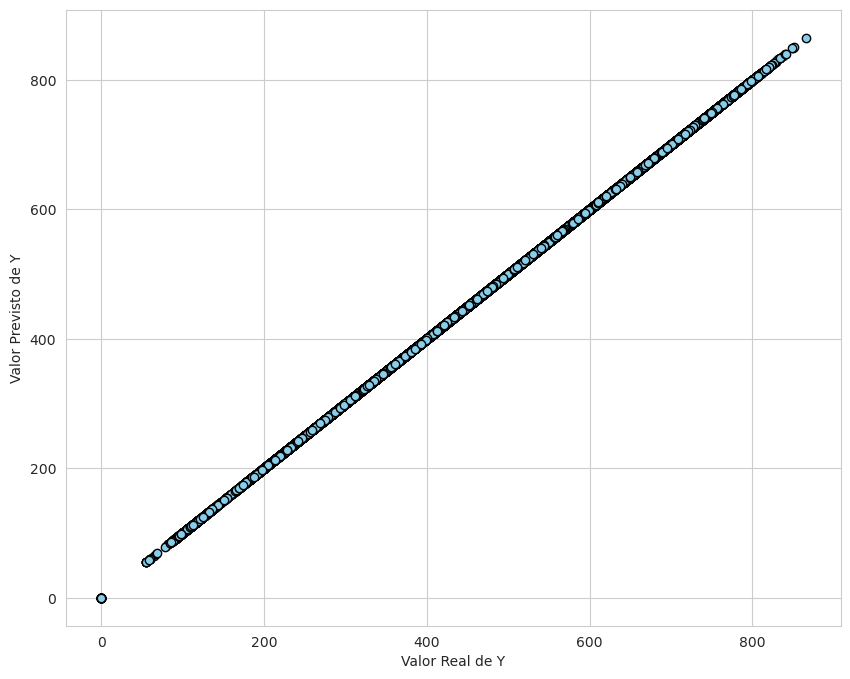

In [24]:
# Plot
plt.figure(figsize = (10,8))
plt.scatter(x = y_teste, y = pred_v1, color = 'skyblue', edgecolors = 'black')
plt.xlabel('Valor Real de Y')
plt.ylabel('Valor Previsto de Y');

In [25]:
# MAE - Erro Médio Absoluto
mean_absolute_error(y_teste, pred_v1)
#O MAE prevê que, em média, as previsões do nosso modelo (de valores gastos) estão erradas em aproximadamente 0.0000000000003, o que é um valor muito pequeno.

3.412553540317708e-13

In [26]:
# MSE - Erro quadrático médio
mean_squared_error(y_teste, pred_v1)

1.9711887889106893e-25

In [27]:
# RMSE - Raiz quadrada do erro quadrático médio
np.sqrt(mean_squared_error(y_teste, pred_v1))

4.4398071905328155e-13

In [28]:
# Coeficiente R2
r2_score(y_teste, pred_v1)
# Nosso modelo é caapz de explicar 100% da variância dos dados, o que é excelente.

1.0

### Dataset padronizado

In [29]:
# Cria o modelo
modelo_v2 = LinearRegression()

In [30]:
# Treinamento do dataset original
modelo_v2.fit(X_treino_padronizado, y_treino)
print('Coeficientes: \n', modelo_v2.coef_)
# Coeficientes das variáveis preditoras
df_coef = pd.DataFrame(modelo_v2.coef_, X.columns, columns = ['Coeficiente'])
print(df_coef)

Coeficientes: 
 [41.16420629 48.19386586 33.13518835 10.21027935  6.93002962]
                 Coeficiente
NU_NOTA_MT         41.164206
NU_NOTA_REDACAO    48.193866
NU_NOTA_CN         33.135188
NU_NOTA_LC         10.210279
NU_NOTA_CH          6.930030


In [31]:
# Avaliacao do modelo do segundo dataset
# Previsões com dados de teste
pred_v2 = modelo_v2.predict(X_teste_padronizado)

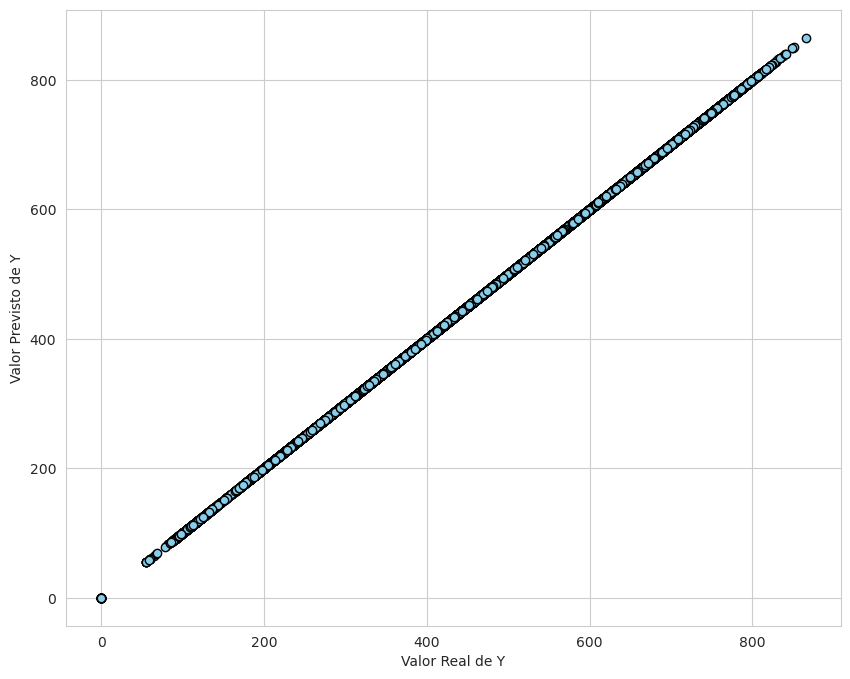

In [32]:
# Plot
plt.figure(figsize = (10,8))
plt.scatter(x = y_teste, y = pred_v2, color = 'skyblue', edgecolors = 'black')
plt.xlabel('Valor Real de Y')
plt.ylabel('Valor Previsto de Y');

In [33]:
# MAE - Erro Médio Absoluto
mean_absolute_error(y_teste, pred_v2)
#O MAE prevê que, em média, as previsões do nosso modelo (de valores gastos) estão erradas em aproximadamente 0.0000000000005, o que é um valor muito pequeno, por'em maior que do modelo anterior.

5.199565712626566e-13

In [34]:
# MSE - Erro quadrático médio
mean_squared_error(y_teste, pred_v2)

4.182460105264059e-25

In [35]:
# RMSE - Raiz quadrada do erro quadrático médio
np.sqrt(mean_squared_error(y_teste, pred_v2))

6.467194217946496e-13

In [36]:
# Coeficiente R2
r2_score(y_teste, pred_v2)
# Nosso modelo é caapz de explicar 100% da variância dos dados, o que é excelente, praticamente tao efetivo quanto o anterior.

1.0

### Dataset na escala entre 0 e 1 para as variaveis preditoras

In [37]:
# Cria o modelo
modelo_v3 = LinearRegression()

In [38]:
# Treinamento do dataset original
modelo_v3.fit(X_treino_min_max, y_treino)
print('Coeficientes: \n', modelo_v3.coef_)
# Coeficientes das variáveis preditoras
df_coef = pd.DataFrame(modelo_v3.coef_, X.columns, columns = ['Coeficiente'])
print(df_coef)

Coeficientes: 
 [246.375      250.         210.7        128.41666667  69.59166667]
                 Coeficiente
NU_NOTA_MT        246.375000
NU_NOTA_REDACAO   250.000000
NU_NOTA_CN        210.700000
NU_NOTA_LC        128.416667
NU_NOTA_CH         69.591667


In [39]:
# Avaliacao do modelo do terceiro dataset
# Previsões com dados de teste
pred_v3 = modelo_v3.predict(X_teste_min_max)

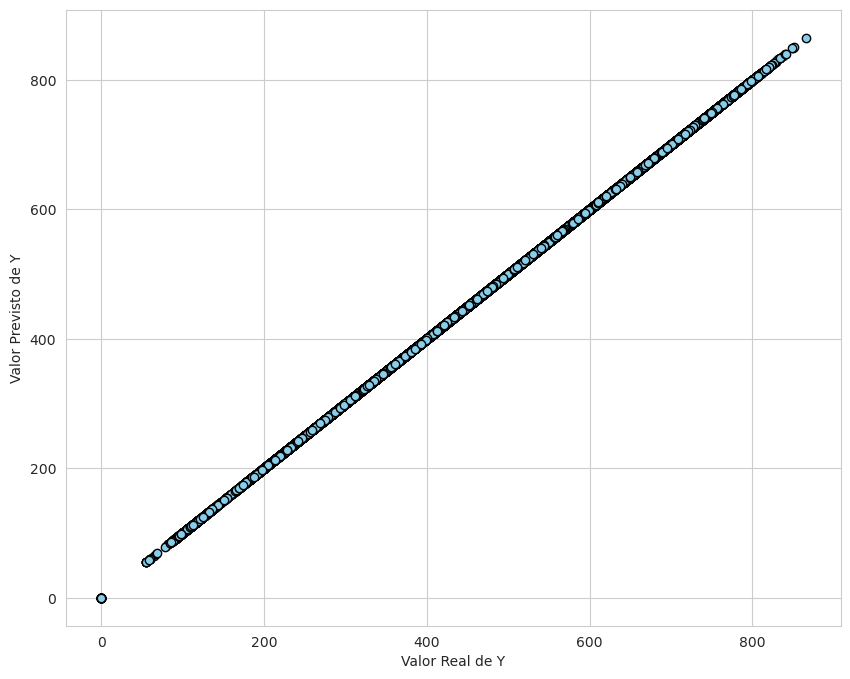

In [40]:
# Plot
plt.figure(figsize = (10,8))
plt.scatter(x = y_teste, y = pred_v3, color = 'skyblue', edgecolors = 'black')
plt.xlabel('Valor Real de Y')
plt.ylabel('Valor Previsto de Y');

In [41]:
# MAE - Erro Médio Absoluto
mean_absolute_error(y_teste, pred_v3)
#O MAE prevê que, em média, as previsões do nosso modelo (de valores gastos) estão erradas em aproximadamente 0.000000000001, o que é um valor muito pequeno, porem maior que os dois modelos anteriores.

1.1381278009306905e-12

In [42]:
# MSE - Erro quadrático médio
mean_squared_error(y_teste, pred_v3)

2.3332306109254544e-24

In [43]:
# RMSE - Raiz quadrada do erro quadrático médio
np.sqrt(mean_squared_error(y_teste, pred_v3))

1.527491607481185e-12

In [44]:
# Coeficiente R2
r2_score(y_teste, pred_v3)
# Nosso modelo é caapz de explicar 100% da variância dos dados, o que é excelente, praticamente tao efetivo quanto os dois anteriores.

1.0

In [ ]:
# Os 3 modelos obtiveram desempenho muito similar, sendo o promeiro sem transformacao nos dados o que obteve menor erro